In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# **Table of Contents :**

1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data for Machine Learning algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution

> **In this notebook, we attempt to predict the survival chance of people on basis of their demographic features. Since it is likely that this is your first project, the notebook is desgined to highlight points where a beginner should focus to maximize their learning. For this, I have taken points from other notebooks as well as approach suggested in the book "Hands on Machine Learning with Scikit-learn and Tensorflow"
**


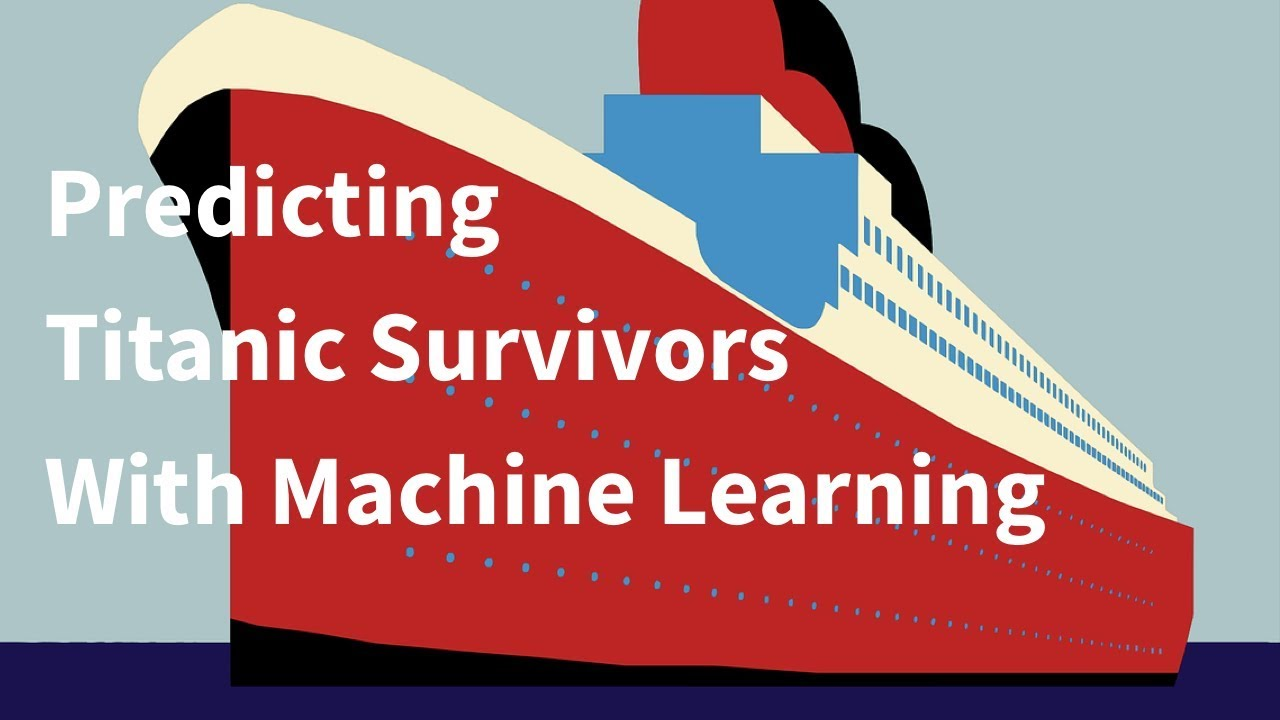

In [3]:
# data analysis and wrangling libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

#Scipy libraries (Statistical Analysis on data)
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import zscore
import math

#Scikit Libraries (Machine Learning)

#preprocessing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#Models (Though a number of algorithms can be tested, we have used only few of them)
##Linear Models 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
##Neighbour Models
from sklearn.neighbors import KNeighborsClassifier
##Support Vector Machine Model
from sklearn.svm import SVC, LinearSVC
## Tree
from sklearn.tree import DecisionTreeClassifier
##Ensemble Models
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
##Neural Networ(sklearn)
from sklearn.neural_network import MLPClassifier
##XGBoost
import xgboost as xgb


#Metrics to evaluate the models
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_curve, roc_auc_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

%timeit 
%matplotlib inline
sns.set_style('darkgrid')

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

# 1. Look at the Big Picture

Welcome to the Titanic Sink Machine Learning Project. Your task is to build a model which will take demographic features of a passenger and predict whether he/she had survived or not. To state simply, few "data points" related to a passenger will go into your model and it will ouptut 1 or 0. But this is not the big picture! In real life, you would not even have the data, forget about such clean data. To understand the big picture, follow this :

1. *Understand the real world situation* : The Titanic Sink was an unfortunate event, it can be called a disaster. But people have survived because the ship did not sink immediately. Those who were able to get out of ship earlier on life boats have survived and this was manual call. Maybe the women & children were given the chance to save their life first or it might depend on the social status of the passenger. Thus, it is a characterstic of a passenger that majorly defines whether he/she might survive or not. This view will help you to understand how your model should behave

2. *Think about the features* : Does wearing a white shirt will help the passenger to survive? Does age matters? Are there features which heavily depend on one another? What features could be added or removed to enhance the quality of model? Adding a lot of features that does not guarantee better performance. Always consider what impact the feature can have on real world situation.

3. *Performance Measure* : Since you are working on a Kaggle Competition and your goal is to improve your model's rank, the performace measure must be in coherance with Kaggle Evaluation method. It can be RMSE, log square error, accuracy, precision, recall and any other. The best model to improve f1 score will not give you best acuracy. For this competition, the performace measure is **Accuracy**. We will train our model to improve the accuracy.

4. How should you frame the problem? : Framing the problem helps you decide which algorithms or performace measure to use. Here we have a labeled data and thus it comes under **Supervised Learning**. We have to predict whether the passenger survived or not and thus the problem is a **Classification Problem**.

Apart from this, there are many questions you can ask to understand the problem in a better way. Feel free to add points which you think might help to imporve your understanding.

# 2. Get the data

As Kaggle provide readily the data, we are not required to put efforts on this point. But keep this in your mind that today data has lot of restriction and you might want to take permission of the respective facilty before using their data on any kind of analysis. Here, we might not have to look for any data permission or obligations but always keep this in your mind before using data from any external source.

In [5]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

## **Take a quick look at the data**

Each row represent a passenger. There are 12 columns with "PassengerId" as indentifier and "Survived" as label. Thus, we have 10 input columns with "Age" & "Fare" as Numerical Feature and "Pclass", "Name", "Sex", "SibSp", "Parch", "Ticket", "Cabin" & "Embarked" as Descriptive Feature(Note we still haven't categorized them as Categorical Feature)

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Discover and visualize the data to gain insights



The best part begins! You are to required to analyze the data and visualize it. These can be done in multiple ways so feel free to use any of the below methods.

In [7]:
#creating a dummy dataset to explore without making any changes to original dataset
dataset = train_df.copy()

### 3.1 Understand the data 

It is important to distinguish between Numerical and Categorical Features because it will allow better visualization of them. Here, we have distinguished between them :

**Numerical Features ** - Age & Fare

*Categorical Features* - Pclass(It is actually an ordinal feature), Sex, SibSp, Parch & Embarked

- Passenger ID is simply an identifier and cannot be regarded as a feature 
- Name & Ticket might help us to extract feature from them
- Cabin is spare and we might have to drop the entire column 

In [8]:
#Variable Distinction
display(dataset.info())
display(dataset.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### 3.2 Exploratory Data Analysis 

Let us look at the output first. Since this is a classification problem, we might want to look whether our data is biased or not!

Below plot shows that more people have not survived. It is case where the output is biased towards value zero. This is helpful because we might not want the threshold probablity to be 50% as there is higher chance of not surviving. This is a simply a speculation and moving forward, we will see we can use it or not.

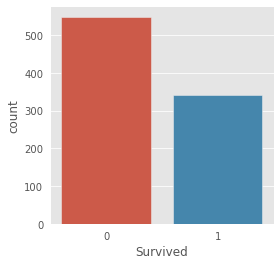

In [9]:
#Checking if our data is bias or not
plt.figure(figsize= (4,4))
sns.countplot(dataset['Survived'])

### Frequency and Distribution Plots
We have already divided the features into numeric and categorical. Before moving to individual variable, let us take a quick look on overall picture.

Few conclusions from the below plots can be:
**Categorical Features**
1. Pclass : More than 50% of passengers below to Class 3. As defined in the dataset, the social status might influnece the survival rate and this could be a determining factor for survival rate.
2. Sex : There are more men than women
3. SibSp & Parch : A large porton of people are travelling alone
4. Embarked : Most people have boarded from "S". We might want to look its dependency on other features

**Numerical Feature**
1. Age : It has almost a normal distribution. We would want to look at the survival rate of people belonging to categories at extreme.
2. Fare : It has a skewed distribution with outliers at right side. 

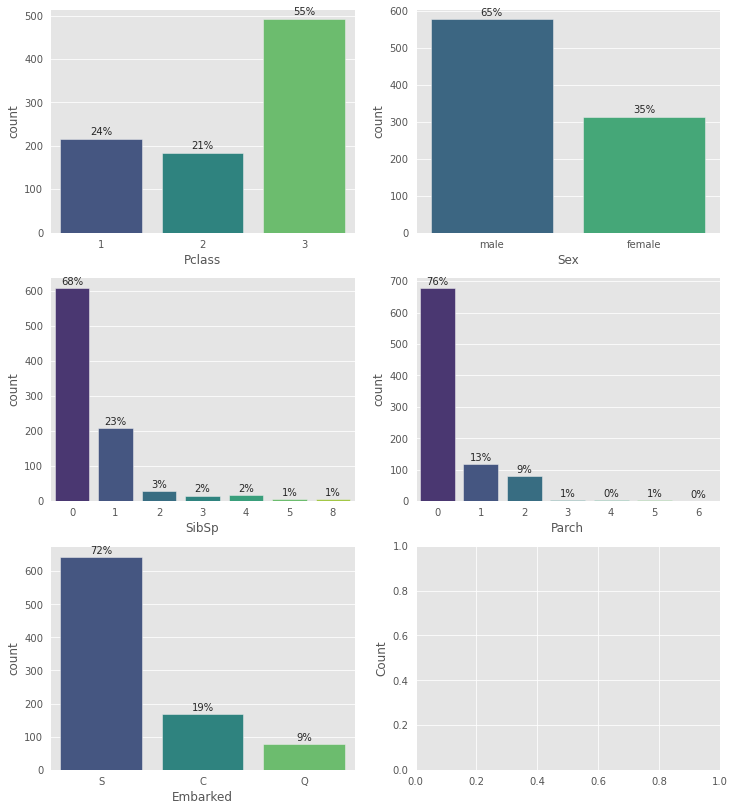

In [10]:
#selecting categorical categories
cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Ploting the count as well as percetage frequency
fig, axes = plt.subplots(3, 2, figsize = (12,14))
axes = axes.flatten()
    
for ax, cat in zip(axes, cat_features) :
    total = float(len(dataset[cat]))      
    sns.countplot(dataset[cat], palette = 'viridis', ax =ax)       
    for p in ax.patches :
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 10,
                '{:1.0f}%'.format((height/total) * 100), ha = 'center',)     
    plt.ylabel('Count')


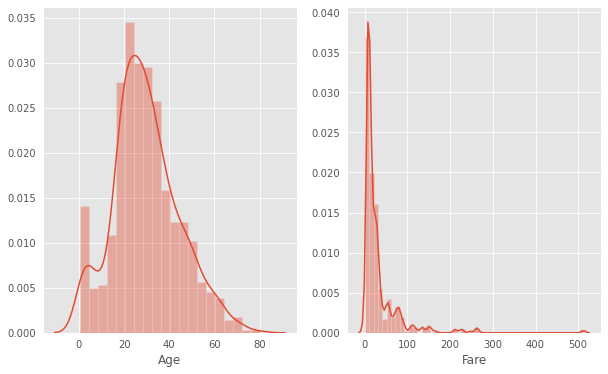

In [11]:
#selecting numerical features 
num_features = ['Age', 'Fare']

# Ploting the distribution plot
fig, axes = plt.subplots(1, 2, figsize = (10,6))
axes = axes.flatten()

for ax, num in zip(axes, num_features) :
    sns.distplot(dataset[num], ax= ax, hist = True, kde = True)


### Correlation Visualization 

Pandas "corr" method calculates Pearson Correlation. We will look at the correlation between the label and variables and also in-between variables. 

From the below plot, we can draw the following conclusions ;
1. Pclass & Fare have highest correlation with the survival 
2. Age as a numerical feature does not have a strong linear correlation. Note this does not mean they are not related. It might happen that they have a different correlation which is non-linear
3. Passenger Class and Fare have high correlation which is obvious. We have to determine that whether both of these features are required or not.
4. Passenger Class has also correlation with Age
5. SibSp & Parch have correaltion which means people having siblings or spouses also have parent and children with them

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

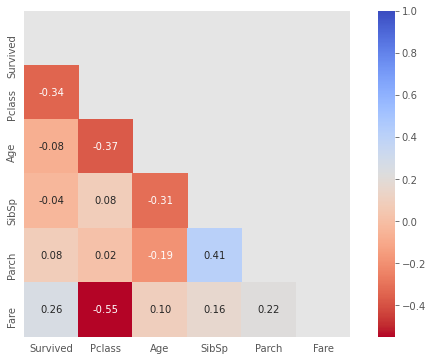

In [12]:
corr = dataset.drop('PassengerId', axis =1).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
display(sns.heatmap(data= corr, cmap= "coolwarm_r", robust= True, annot= True, square= True, mask= mask, fmt= "0.2f"))
display(train_df.corr()['Survived'].sort_values())

### Individual Feature Visualization
Now, we are ready to go for a column wise inspection of features. Here we have less features so it is possible to check for all the features. If there are many features, select the few which you suspect might give you strong conclusions

### Pclass

We have already observed that there is correlation between Pclass and Survived. Below are few conclusions that we can get from the visualizations :

1. For Passenger belonging to Class 3, there is only 33% probability that they will survive
2. Highest survival probability is of Class 1 passengers and then is for Class 2
3. There is correlation of Pclass with Age and Fare. We want to keep in mind that this correaltion might decrease the feature importance of Age or Fare (or even Pclass)

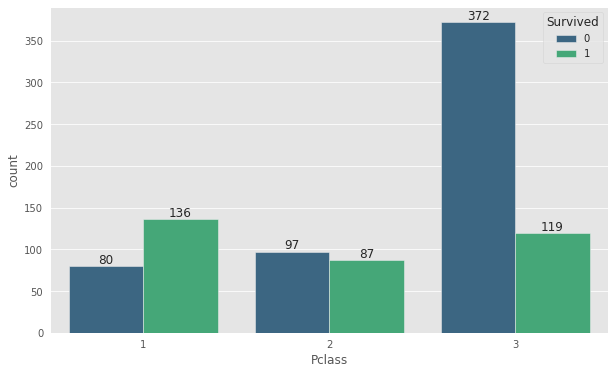

In [13]:
display(sns.countplot(dataset['Pclass'], hue = dataset['Survived'], palette= "viridis"))

ax = plt.gca()
# Iterate through the list of axes' patches
total = len(dataset['Pclass'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.0f}'.format(height), 
            fontsize=12, ha='center', va='bottom')

In [14]:
dataset.corr()['Pclass'].sort_values()

Fare          -0.549500
Age           -0.369226
Survived      -0.338481
PassengerId   -0.035144
Parch          0.018443
SibSp          0.083081
Pclass         1.000000
Name: Pclass, dtype: float64

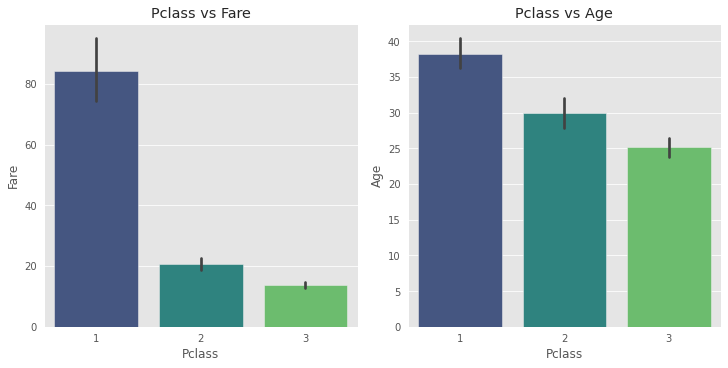

In [15]:
fig = plt.figure(constrained_layout = True, figsize = (10,5))
#Creating a grid of 2 cols and 1 rows
grid = gridspec.GridSpec(ncols= 2, nrows=1, figure= fig)

#Plot Pclass vs Fare
ax1 = fig.add_subplot(grid[0,0])
ax1.set_title('Pclass vs Fare')
sns.barplot(x="Pclass",y="Fare",data=dataset, palette = "viridis", ax= ax1)

#Plot Pclass vs Age
ax1 = fig.add_subplot(grid[0,1])
ax1.set_title('Pclass vs Age')
sns.barplot(x="Pclass",y="Age",data=dataset, palette = "viridis", ax= ax1)

### Age

Initutively thinking, Age should be most determining factor but we have to keep in mind that it is also interacting a lot with other features. Older people might have more wealth and thus can travel in Pclass 1 with higher survival probability. This does not mean that Age is reason behind survival. Keeping this in mind, let us summarize our findings:
1. Age has a normal distribution with slight skew on right side
2. Box plot indicates that the distribution of age for survived or not is similar
3. Spliting the age into category provide a better distinction between survived or not. We can look forward into this prospective

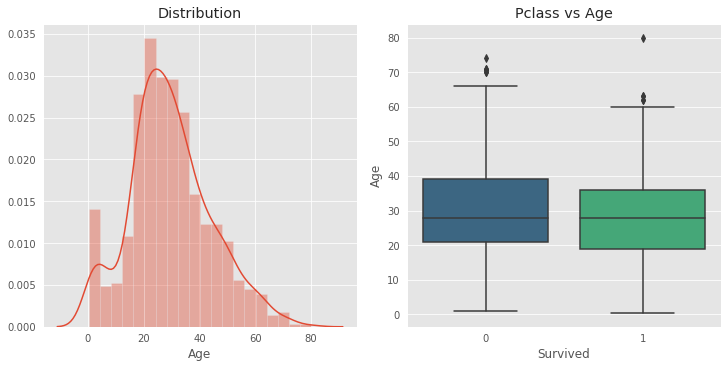

In [16]:
fig = plt.figure(constrained_layout = True, figsize = (10,5))
#Creating a grid of 2 cols and 1 rows
grid = gridspec.GridSpec(ncols= 2, nrows=1, figure= fig)

#Distribution plot 
ax1 = fig.add_subplot(grid[0,0])
ax1.set_title('Distribution')
sns.distplot(dataset["Age"], label="Skewness : %.1f"%(dataset["Age"].skew()), ax= ax1)

#Box plot of Age with Survival 
ax1 = fig.add_subplot(grid[0,1])
ax1.set_title('Pclass vs Age')
sns.boxplot(x="Survived", y="Age",data=dataset, palette = "viridis", ax= ax1)

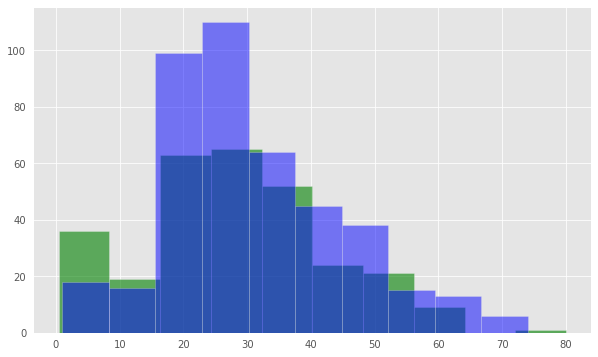

In [17]:
dataset[dataset['Survived'] == 1]['Age'].hist(alpha = 0.6, bins = 10, color = 'g')
dataset[dataset['Survived'] == 0]['Age'].hist(alpha = 0.5, bins = 10, color = 'b')

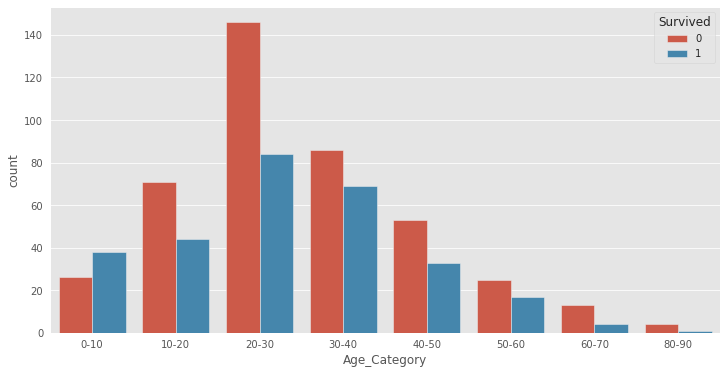

In [18]:
#let us try to split the age into categories
dataset['Age_Category'] = pd.cut(dataset['Age'], bins= 8,labels = ['0-10', '10-20', '20-30', '30-40', '40-50', 
                                                                    '50-60','60-70', '80-90'])
plt.figure(figsize= (12,6))
sns.countplot(dataset['Age_Category'], hue= dataset['Survived'])

### Sex
It can concluded that women have a higher chance of survival than men. 

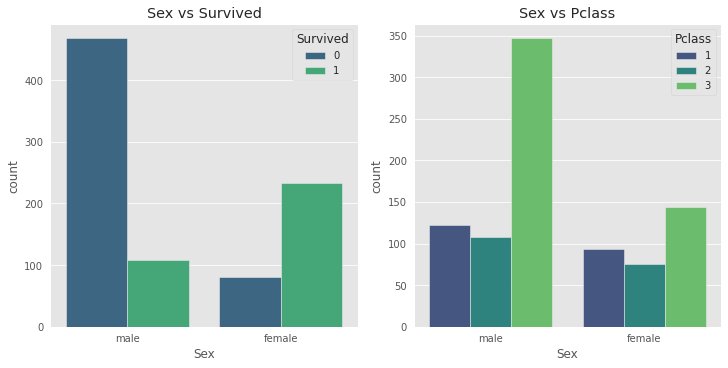

In [19]:
fig = plt.figure(constrained_layout = True, figsize = (10,5))
#Creating a grid of 2 cols and 1 rows
grid = gridspec.GridSpec(ncols= 2, nrows=1, figure= fig)

#Box plot of Sex with Survived
ax1 = fig.add_subplot(grid[0,0])
ax1.set_title('Sex vs Survived')
sns.countplot(dataset['Sex'], hue = dataset['Survived'], palette= "viridis", ax= ax1)

#Box plot of Age with Survival 
ax1 = fig.add_subplot(grid[0,1])
ax1.set_title('Sex vs Pclass')
sns.countplot(dataset['Sex'], hue = dataset['Pclass'], palette= "viridis", ax= ax1)


### Family

We have two features which describe the family status of the passenger. It is important to understand that whether both the features are contributing something to the survival status or they can clubbed into one feature. Also does the size of the family is a factor or not. From the below visualization, we can form the required conclusion :

1. Parch & SibSp exhibits a similar behvaiour and thus can be clubbed together into a new feature as "Family"
2. Family provide a interesting behaviour. Passengers with no family have huge disadvantage. Passengers having family size from 1-3 have high survival chance whereas having more than 3 leads to low survival chance. We can use this property to engineer a new feature

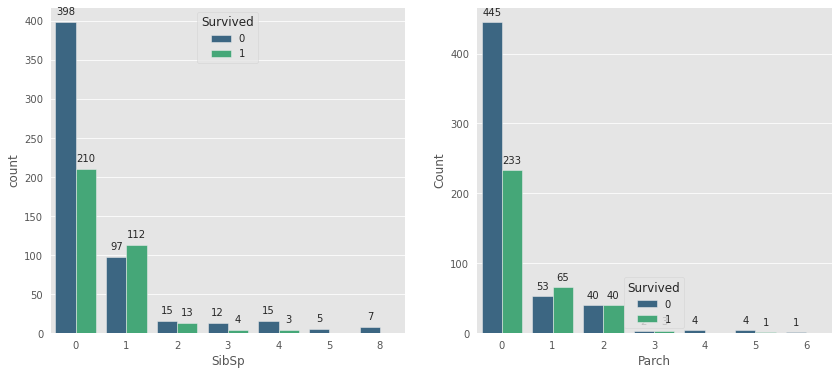

In [20]:
#selecting categorical categories
family_features = ['SibSp', 'Parch']

# Ploting the count as well as percetage frequency
fig, axes = plt.subplots(1, 2, figsize = (14,6))
axes = axes.flatten()
    
for ax, cat in zip(axes, family_features) :
    total = float(len(dataset[cat]))      
    sns.countplot(dataset[cat], palette = 'viridis', ax =ax, hue= dataset['Survived'])
    for p in ax.patches :
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 10,
                '{:1.0f}'.format(height), ha = 'center',)     
    plt.ylabel('Count')


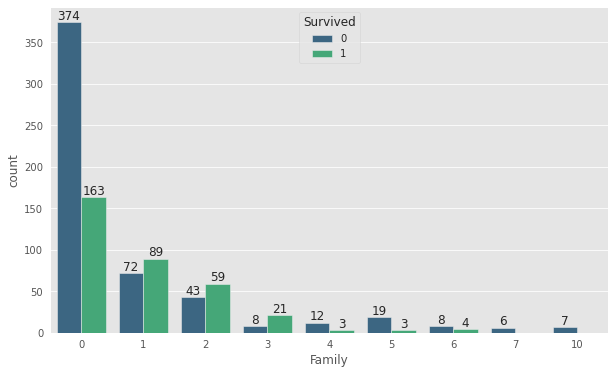

In [21]:
dataset['Family'] = dataset.apply(lambda x : x.SibSp + x.Parch, axis = 1)

sns.countplot(dataset['Family'], hue = dataset['Survived'], palette= "viridis")
ax = plt.gca()

# Iterate through the list of axes' patches
total = len(dataset['Pclass'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.0f}'.format(height), 
            fontsize=12, ha='center', va='bottom')


### Embarked

This defines the port of Embarkation of the passenger. A correlation between the survival status of a passenger and the port will depend only if a certain class of passengers embark from a particular port. From the below visualization, it is diffcult to understand a direct correlation between these two.

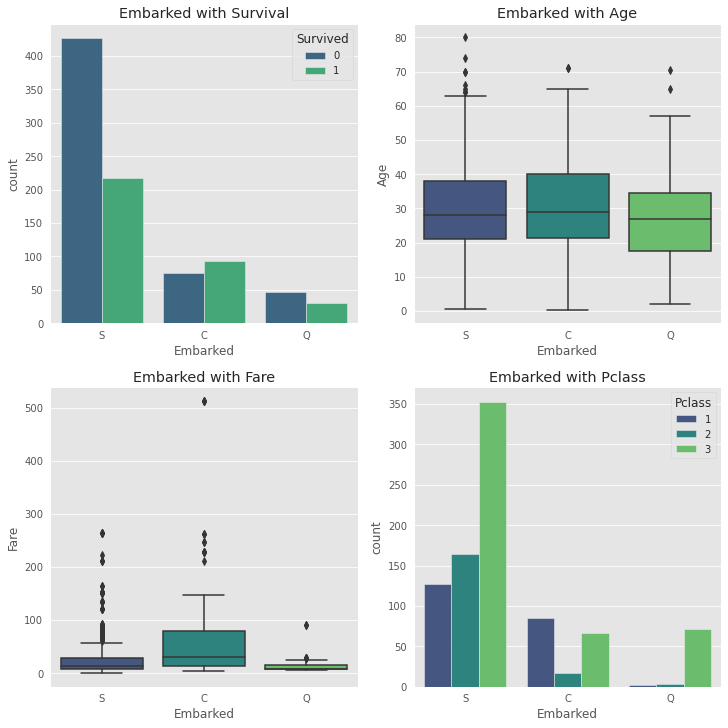

In [22]:
fig = plt.figure(constrained_layout = True, figsize= (10,10))
grid = gridspec.GridSpec(ncols= 2, nrows= 2, figure= fig)

#Count plot of Embarked with Survival 
ax1 = fig.add_subplot(grid[0,0])
ax1.set_title('Embarked with Survival')
sns.countplot(x=dataset["Embarked"], hue= dataset["Survived"], palette = "viridis", ax= ax1)

#Box plot of Embarked with Age 
ax1 = fig.add_subplot(grid[0,1])
ax1.set_title('Embarked with Age')
sns.boxplot(x="Embarked", y="Age", data=dataset, palette = "viridis", ax= ax1)

#Box plot of Embarked with Fare 
ax1 = fig.add_subplot(grid[1,0])
ax1.set_title('Embarked with Fare')
sns.boxplot(x="Embarked", y="Fare", data=dataset, palette = "viridis", ax= ax1)

#Box plot of Embarked with Pclass 
ax1 = fig.add_subplot(grid[1,1])
ax1.set_title('Embarked with Pclass')
sns.countplot(dataset["Embarked"], hue =dataset['Pclass'], palette = "viridis", ax= ax1)

### Fare

Fare has already been observed in Pclass as a contributing factor. We can make the following observation from the visualizations:
1. Fare has heavily skewed with outliers. 
2. Survived passengers had higher fare but have many outliers


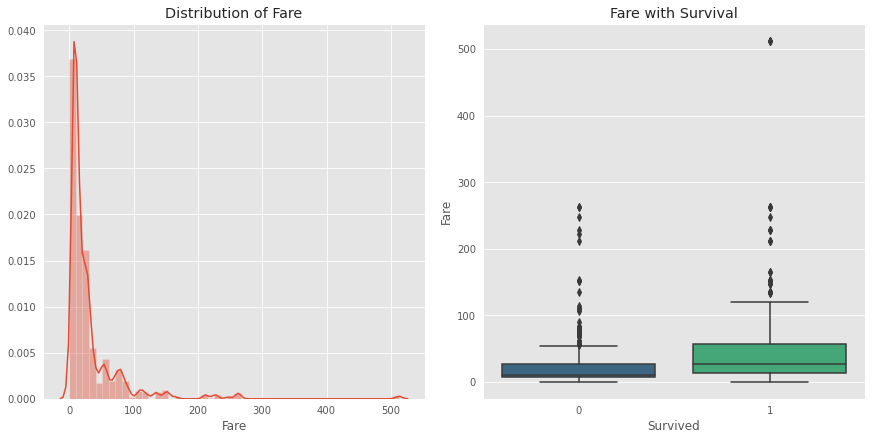

In [23]:
fig = plt.figure(constrained_layout = True, figsize= (12,6))
grid = gridspec.GridSpec(ncols= 2, nrows= 1, figure= fig)

#Distribution of Fare
ax1 = fig.add_subplot(grid[0,0])
ax1.set_title('Distribution of Fare')
sns.distplot(dataset["Fare"], label="Skewness : %.1f"%(dataset["Fare"].skew()))

#Box plot of Fare with Survival 
ax1 = fig.add_subplot(grid[0,1])
ax1.set_title('Fare with Survival')
sns.boxplot(x="Survived", y="Fare", data=dataset, palette = "viridis", ax= ax1)


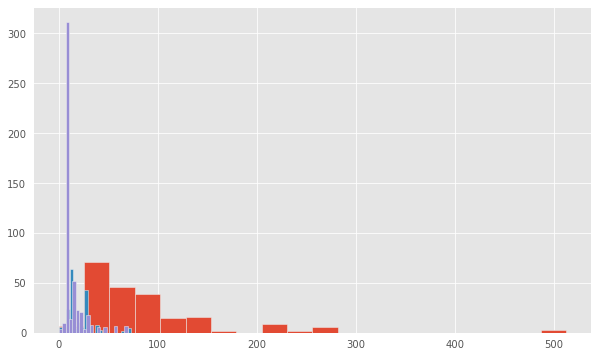

In [24]:
dataset[dataset['Pclass']== 1]['Fare'].hist(bins = 20)
dataset[dataset['Pclass']== 2]['Fare'].hist(bins = 20)
dataset[dataset['Pclass']== 3]['Fare'].hist(bins = 20)

### Cabin

Cabin feature is heavily spare and thus on Cabin value, we might not be able to get any concusion. We will consider that Passenger with Null value in cabin does not have any cabin and other have. Below we can see that, passenger with cabin have higher survival chance.

In [25]:
dataset['Cabin'].fillna('None', inplace = True)
dataset['Have Cabin'] = dataset['Cabin'].apply(lambda x : "Yes" if x != 'None' else "No")

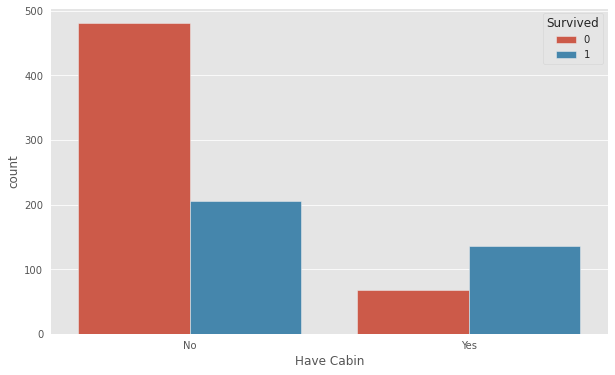

In [26]:
sns.countplot(dataset['Have Cabin'], hue = dataset['Survived'])

For "Name" & "Ticket", we have to incorporate feature engineering.

# 4. Prepare the data for Machine Learning Algorithm

Preparing the data involves imputing the null values, feature engineering & encoding categorical features. For this, we will combine our test data and train data to look at the complete data together. Please note that this is not a good thing to do in real life ML projects. You would never want your test data to be mixed with training data. This lead to "spilling effect".

In [27]:
merged_df = pd.concat([train_df, test_df], sort= False).reset_index(drop= True)
merged_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 4.1 Impute Null Values

We have null values in Age, Fare & Embarked(currently we will ignore the Cabin value as we deal with later on)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


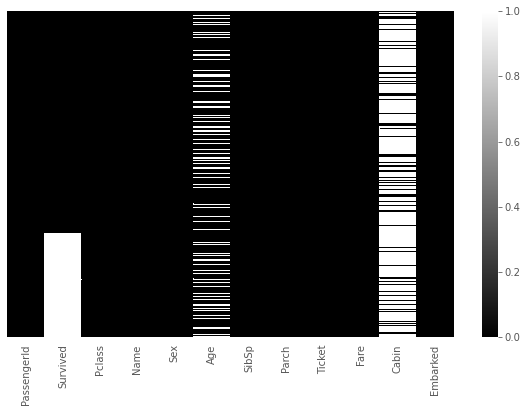

In [28]:
merged_df.info()
display(sns.heatmap(merged_df.isna(), cmap= 'binary_r', yticklabels = False))

### 4.1.1 Imputing Age

We can either use other variables to impute the age or use an average value. Here, we are more inclined to use a average value because age cannot be derived from other features which are present here. We will impute the value with a random value within 1 standard deviation of mean

In [29]:
# get mean, standard deviation and number of null values
mean = train_df["Age"].mean()
std = train_df["Age"].std()

def impute_age(age) :   
    if age != age :
        return np.random.randint(mean - std, mean + std)
    else :
        return age
    
merged_df['Age'] = merged_df['Age'].apply(lambda x : impute_age(x))

### 4.1.2 Fare & Embarked values

Since there is only one instance of Fare null value and two instance of Embarked value, we can groupby the data and look at the relevant value for the fare. Ideally we should write a function as we have done in imputing the Age but for simplicity sake, we will simply input the value. On the basis of the pivot table, we can correlate the Fare and Embarked Value and fill the missing value

In [30]:
#identify the missing Fare value passenger
display(merged_df[merged_df['Fare'].isna()])

#identify the missing Embarked value passenger
display(merged_df[merged_df['Embarked'].isna()])

#identify aggregate value of Fare under depending section
display(merged_df.groupby(['Pclass', 'Embarked']).mean()['Fare'])

#fill the relevant value of the Fare for the Passenger
merged_df.loc[1043, 'Fare'] = 14

#fill the relevant value of the Embarked for the Passenger
merged_df.loc[61, 'Embarked'] = 'S'
merged_df.loc[829, 'Embarked'] = 'S'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [31]:
#drop the extra columns
merged_df.drop('PassengerId', axis= 1, inplace= True)

## 4.2 Feature Engineering

Feature Engineering involves adding new features, discretize continuous features, decompose features & add promising transformation of features (e.g, log(x),sin(x) etc)

### 4.2.1 Name

Observation on the few names listed below tell us that it contains "Title" & as well as designation of the person. People with longer name(having some important designation) might have higher chance of survival

In [32]:
merged_df['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

We will extract Title from the name. As observed, there are only few dominant title values and others are very less frequent. We will club all the other values in one category named "Other".

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.', 'Dona.'], dtype=object)

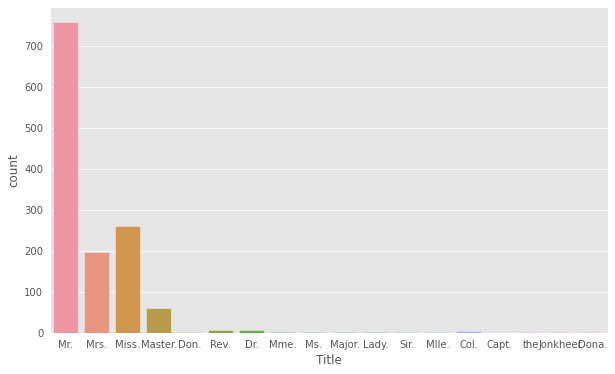

In [33]:
merged_df['Title'] = merged_df['Name'].apply(lambda x : x.split(',')[1].split(' ')[1].strip())
display(merged_df['Title'].unique())
display(sns.countplot(merged_df['Title']))

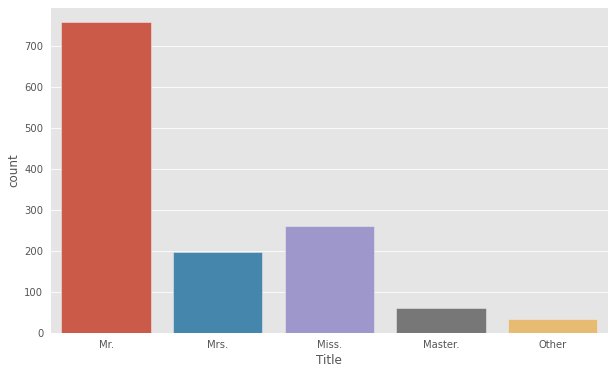

In [34]:
merged_df["Title"] = merged_df["Title"].replace(['Don.', 'Rev.', 'Dr.', 'Mme.','Ms.', 'Major.', 'Lady.', 
                                                 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the','Jonkheer.', 'Dona.'], 'Other')
display(sns.countplot(merged_df['Title']))

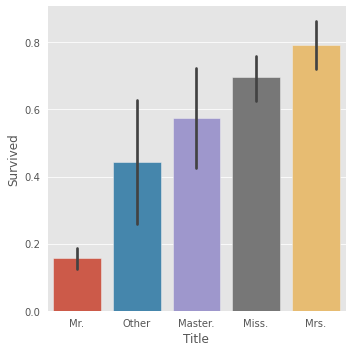

In [35]:
sns.factorplot(x="Title",y="Survived",data=merged_df,kind="bar", order = ['Mr.', 'Other', 'Master.', 'Miss.', 'Mrs.'])

In [36]:
#convert them into ordinal values
merged_df['Title'] = merged_df['Title'].map({'Mr.' : 0, 'Other' : 1,'Master.' : 2,'Miss.' : 3,'Mrs.' : 4})

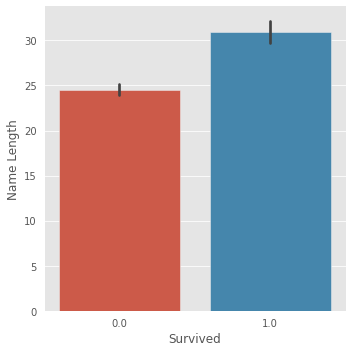

In [37]:
#name length
merged_df['Name Length'] = merged_df['Name'].apply(lambda x : len(x))
display(sns.factorplot(x ='Survived', y= 'Name Length',kind = 'bar', data = merged_df))

In [38]:
#drop name variable 
merged_df.drop('Name', axis= 1, inplace= True)

### 4.2.2 Family

We have already seen that by combining the "Parch" & "SibSp" we can generate "Family" feature which is more useful. Also Family can be converted into a categorical feature to sustain the meaning.

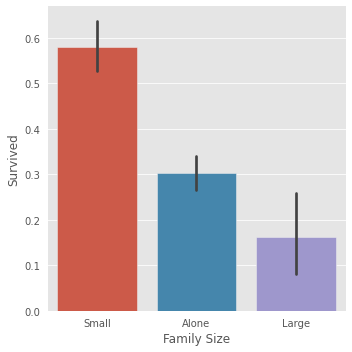

In [39]:
#creating family feature
merged_df['Family'] = merged_df.apply(lambda x : x.SibSp + x.Parch, axis=1)

#creating into categorical feature
merged_df['Family Size'] = merged_df['Family'].apply(lambda x : "Alone" if x == 0 else "Small" if x < 4 else "Large")

display(sns.factorplot(y ='Survived', x= 'Family Size',kind = 'bar', data = merged_df))

In [40]:
#converting family size to categorical features
fam_features = pd.get_dummies(merged_df['Family Size'], drop_first= True, prefix= "Fam")
merged_df = pd.concat([merged_df, fam_features], axis= 1)

#drop Parch, Sibsp & Family feature
merged_df.drop(['Parch', 'SibSp', 'Family', 'Family Size'], axis= 1, inplace = True)

### 4.2.3 Cabin

As already shown in visualization, we will create a subsitiute value for having cabin or not with 1 and 0

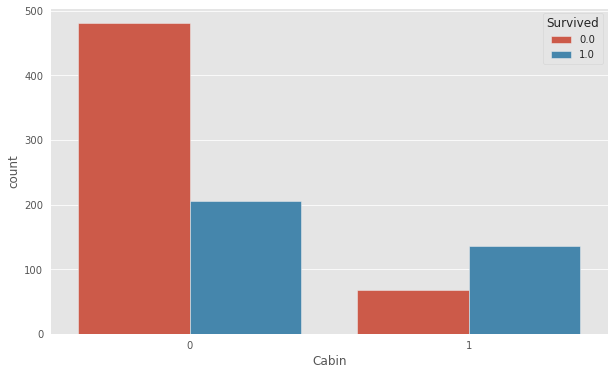

In [41]:
#imputing NA values with 0
merged_df['Cabin'].fillna(0, inplace = True)

#changing other values to 1
merged_df['Cabin'] = merged_df['Cabin'].apply(lambda x : 0 if x ==0 else 1)

display(sns.countplot(merged_df['Cabin'], hue = merged_df['Survived']))

### 4.2.4 Ticket


In [42]:
merged_df['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [43]:
def ticket_prefix(ticket) :
    #if ticket is alphabetic(not numeric)
    if not ticket.isdigit() :
        return ticket.replace(".","").replace("/","").strip().split(' ')[0]
    else :
        return 'No'

merged_df['Ticket prefix int'] = merged_df['Ticket'].apply(lambda x : x.split()[0])
merged_df['Ticket prefix'] = merged_df['Ticket prefix int'].apply(lambda x : ticket_prefix(x))

In [44]:
display(merged_df['Ticket prefix'].nunique())
display(merged_df['Ticket prefix'].unique())

37

array(['A5', 'PC', 'STONO2', 'No', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

In [45]:
#converting to categorical feature
ticket_feature = pd.get_dummies(merged_df['Ticket prefix'], drop_first= True, prefix= "Tic")

#merging the tables
merged_df = pd.concat([merged_df, ticket_feature], axis=1)

#drop Ticket columns
merged_df.drop(['Ticket', 'Ticket prefix int', 'Ticket prefix'], axis =1 ,inplace= True)

### 4.2.5 Converting Pclass, Sex, Embarked into Categorical Variable

In [46]:
# Create categorical values for Pclass
merged_df["Pclass"] = merged_df["Pclass"].astype("category")
pclass_feature = pd.get_dummies(merged_df["Pclass"],prefix="Pc", drop_first= True)
merged_df = pd.concat([merged_df, pclass_feature], axis= 1)

# Create categorical values for Sex
sex_feature = pd.get_dummies(merged_df["Sex"],prefix="Sex", drop_first= True)
merged_df = pd.concat([merged_df, sex_feature], axis= 1)

# Create categorical values for Embarked
embarked_feature = pd.get_dummies(merged_df["Embarked"],prefix="Em", drop_first= True)
merged_df = pd.concat([merged_df, embarked_feature], axis= 1)

#drop the duplicate columns
merged_df.drop(['Pclass', 'Sex', 'Embarked'],axis= 1, inplace= True)

### 4.2.6 Age

As observed during the visualization, converting the age into a categorical variable provides a clear distinction between survival probabilities

In [47]:
merged_df['Age_Category'] = pd.cut(merged_df['Age'], bins= 8,labels = ['0-10', '10-20', '20-30', '30-40', '40-50', 
                                                                    '50-60','60-70', '80-90'])

features = pd.get_dummies(merged_df['Age_Category'], drop_first= True, prefix= 'Age')

merged_df = pd.concat([merged_df, features], axis=1)

merged_df.drop(['Age', 'Age_Category'], axis=1, inplace= True)

### 4.3 Scaling

Only fare is a variable which is on a continous varaible and thus will require scaling

In [48]:
#spliting back the data into training and test data
training_data = merged_df.iloc[:891,:]  
test_data = merged_df.iloc[891 :,:] 
test_data.drop('Survived', axis =1, inplace =True)

X_train = training_data.drop('Survived', axis = 1).values
y_train = training_data['Survived'].values

X_test = test_data.values

display(X_train.shape)
display(y_train.shape)
display(X_test.shape)

(891, 54)

(891,)

(418, 54)

In [51]:
#create a scaling object
scaler = MinMaxScaler()

#fit the object only on training data and not test data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 5.Select a model and train it

Selecting a model is an iterative process. There is no free lunch in this process. First, we will cross validate our data on different algorithms and look where it is performing the best. Once identified, we can keep fine tuning our model.

In [52]:
#write a function to evaluate your model

def evaluate_accuracy(model) :
    
    print(str(model))
    #On Training Data
    model.fit(X_train, y_train)
    predict_train = model.predict(X_train)
    training_accuracy = accuracy_score(y_train, predict_train)
    print("Training Data")
    print(confusion_matrix(y_train, predict_train))
    print(f'Accuracy Score: {training_accuracy}')
    print('-'*50)
    print("Validation Data")
    predict_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy')
    validation_accuracy = predict_score.mean()
    print(f'Accuracy Score: {validation_accuracy}')
    print('')
    return training_accuracy, validation_accuracy

In [53]:
models = []
k = 42
#Linear Class
logistic_clf = LogisticRegression(random_state= k)
ridge_clf = RidgeClassifier(random_state= k)
models.append(logistic_clf)
models.append(ridge_clf)

#Neighbor Class
knn_clf = KNeighborsClassifier()
models.append(knn_clf)

#SVC Class
svc_clf = SVC(random_state= k)
linearsvc_clf = LinearSVC(random_state= k)
models.append(svc_clf)
models.append(linearsvc_clf)

#Tree Class
tree_clf = DecisionTreeClassifier(random_state= k)
models.append(tree_clf)

#Ensemble
randomforest_clf = RandomForestClassifier(random_state= k)
bagging_clf = BaggingClassifier(random_state= k)
gradboosting_clf = GradientBoostingClassifier(random_state= k)
adaboosting_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state= k),random_state= k)
models.append(randomforest_clf)
models.append(bagging_clf)
models.append(gradboosting_clf)
models.append(adaboosting_clf)

#Neural Network
mlp_clf = MLPClassifier(random_state = k)
models.append(mlp_clf)

#Xgboost
xgboost = xgb.XGBClassifier(random_state = k)
models.append(xgboost)

In [54]:
training_accuracy = []
validation_accuracy = []

for model in models :
    train_acc, val_acc = evaluate_accuracy(model)
    training_accuracy.append(train_acc)
    validation_accuracy.append(val_acc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training Data
[[487  62]
 [ 90 252]]
Accuracy Score: 0.8294051627384961
--------------------------------------------------
Validation Data
Accuracy Score: 0.8226841448189763

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)
Training Data
[[490  59]
 [ 89 253]]
Accuracy Score: 0.8338945005611672
--------------------------------------------------
Validation Data
Accuracy Score: 0.8238077403245944

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5

In [55]:
result = pd.DataFrame({'Algorithm' : ['Logistic', 'Ridge', 'KNN', 'SVC', 'Lin SVC', 'Tree', 
                                     'Rnd Forest', 'Bagging', 'Grad Boost', 'AdaBoost', 'MLP', 'XGBoost'], 
                       'Training Accuracy': training_accuracy, 'Validation Accuracy' : validation_accuracy})

display(result)

,Algorithm,Training Accuracy,Validation Accuracy
0,Logistic,0.829405,0.822684
1,Ridge,0.833895,0.823808
2,KNN,0.847363,0.781236
3,SVC,0.841751,0.828302
4,Lin SVC,0.833895,0.820437
5,Tree,0.992144,0.778926
6,Rnd Forest,0.992144,0.818177
7,Bagging,0.973064,0.819363
8,Grad Boost,0.914703,0.822672
9,AdaBoost,0.992144,0.794707


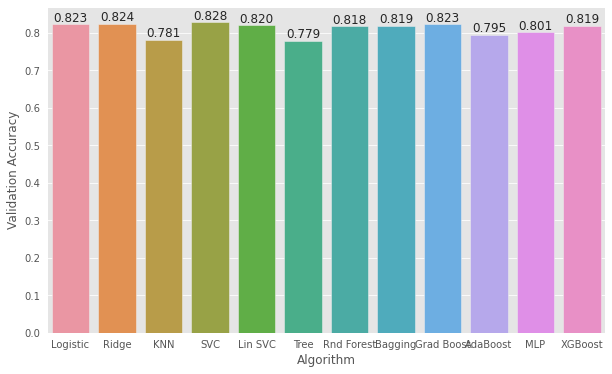

In [56]:
sns.barplot(x = 'Algorithm',  y = 'Validation Accuracy', data = result)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.3f}'.format(height), 
            fontsize=12, ha='center', va='bottom')

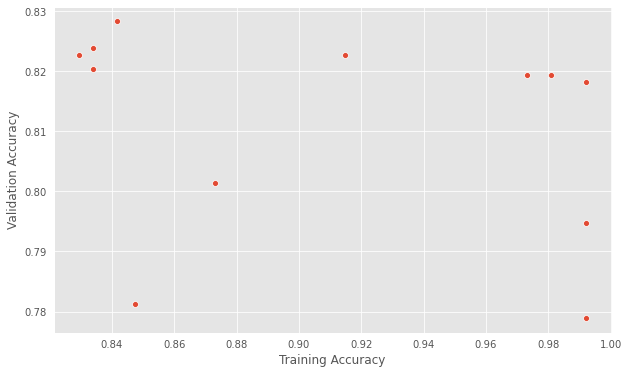

In [57]:
sns.scatterplot(x = 'Training Accuracy', y='Validation Accuracy', data = result)

We have calculated Training Accuracy and Validation Accuracy. If the difference between Training Error and Validation Error is high, it implies the model is overfitting the data and could perform worse in case real test set. We have obtained the best accuracy(Validation) in "SVC" & "Gradient Boosting". Both look promising as they have lower training error too which could be improved with tuning.

# 6. Fine-tune your model

## 6.1 SVC

Support Vector Machine uses kernel design to transform the data and then based on these transformations it finds an optimal boundary between the possible outputs. Thus the choice of "kernal" and C (measure of how much error it can handle to fit the data) determines the behaviour of data.

In [58]:
#tuning the model

svc_classifier = SVC()
param_grid = {'C': [0.1, 1, 3], 'kernel': ['rbf', 'linear'], 'gamma' : ['scale', 0.1, 0.01], 
              'degree' : [1 ,3,5], 'break_ties': ['True', 'False']}

svc_grid = GridSearchCV(svc_classifier, param_grid, scoring= "accuracy", cv= 10)
svc_grid.fit(X_train, y_train)
print(f'Best Score: {svc_grid.best_score_:0.5f}')
print(f'Best Parameter: {svc_grid.best_params_}')

Best Score: 0.83503
Best Parameter: {'C': 3, 'break_ties': 'True', 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [60]:
optimized_svc = SVC(C=1.0, break_ties=True, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
                    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,verbose=False)

scores = cross_val_score(optimized_svc, X_train, y_train, cv = 10)
print(f'Tuned SVC Score: {scores.mean()}')

Tuned SVC Score: 0.8125967540574282


## 6.2 Gradient Boosting

In [ ]:
# Gradient boosting tunning

gb_clf= GradientBoostingClassifier(random_state= 42)

#param_grid = {'loss' : ["deviance"], 'n_estimators' : [100,300, 500, 750], 'learning_rate': [0.3 ,0.1],
#              'max_depth': [8,10,12], 'min_samples_leaf': [50,75,100],'max_features': [0.3, 0.1]  }

''' Best Parameters from first grid are : {'learning_rate': 0.3, 'loss': 'deviance', 'max_depth': 10,
 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 500}
'''

param_grid_2 = {'loss' : ["deviance"], 'n_estimators' : [500, 600], 'learning_rate': [0.3, 0.5, 0.7],
               'max_depth': [9,10,11], 'min_samples_leaf': [100, 150],'max_features': [0.3, 0.5, 0.7]}

param_grid_3 = {'loss' : ["deviance"], 'n_estimators' : [600], 'learning_rate': [0.3, 0.4],
               'max_depth': [9], 'min_samples_leaf': [100, 120],'max_features': [0.3, 0.4]}

gb_grid = GridSearchCV(gb_clf, param_grid_3, cv=10, scoring="accuracy", n_jobs=-1)
gb_grid.fit(X_train,y_train)
print(f'Best Score: {gb_grid.best_score_:0.5f}')
print(f'Best Parameter: {gb_grid.best_params_}')

In [ ]:
optimized_gb = GradientBoostingClassifier(learning_rate =  0.3, max_depth = 9, max_features = 0.4, min_samples_leaf =  100, 
                                          n_estimators = 700, random_state= 42)

scores = cross_val_score(optimized_gb, X_train, y_train, cv = 10)
print(f'Tuned Gradient Boosting Score: {scores.mean()}')

## 6.3 Random Forest

In [ ]:
# RFC Parameters tunning 
rf_clf = RandomForestClassifier()


## Search grid for optimal parameters
param_grid = {"max_depth": [None],"max_features": [1,10, 15, 18], "min_samples_split": [5, 10, 12],
              "min_samples_leaf": [1, 3],"bootstrap": [True, False],"n_estimators" :[300, 750],
              "criterion": ["gini"]}


rf_grid = GridSearchCV(rf_clf,param_grid = param_grid, cv=10, scoring="accuracy")

rf_grid.fit(X_train,y_train)
rf_grid.best_score_

In [ ]:
optimized_rf = RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = None, max_features = 15, 
                                      min_samples_leaf = 1, min_samples_split = 10, n_estimators = 750, random_state=42)

scores = cross_val_score(optimized_rf, X_train, y_train, cv = 10)
print(f'Tuned Random Forest Score: {scores.mean()}')

## 6.4 Neural Network 

In [ ]:
#creating training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
X_train.shape

In [ ]:
model = Sequential()

# Adding the input layer and first hidden layer
model.add(Dense(input_dim=54, units=32, activation='relu'))
model.add(Dropout(rate=0.75)) 

# Adding the second hidden layer
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.5))

# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

#Early Stopping
early_stop  = EarlyStopping(monitor= 'val_loss', mode = 'min', patience= 25, verbose=1)

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, batch_size=10, epochs=500, validation_data = (X_val,y_val), verbose = 3,
          callbacks = [early_stop])

In [ ]:
history = pd.DataFrame(model.history.history)

fig, axes = plt.subplots(2,1, figsize = (10,8))

axes[0].plot(history['loss'], 'r', label = 'Training Loss')
axes[0].plot(history['val_loss'], 'b', label = 'Validation Loss')
legend  = axes[0].legend()

axes[1].plot(history['accuracy'], 'r', label = 'Training Accuracy')
axes[1].plot(history['val_accuracy'], 'b', label = 'Validation Accuracy')
legend  = axes[1].legend()

# 7. Present your solution


In [ ]:
#fit the model on complete data
random_forest = RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = None, max_features = 15, 
                                      min_samples_leaf = 1, min_samples_split = 10, n_estimators = 750, random_state=42)

random_forest.fit(X_train, y_train)

#predict for the test set
predictions = random_forest.predict(X_test)

In [ ]:
submission = pd.DataFrame(columns= ['PassengerId', 'Survived'])
submission['PassengerId'] = test_df['PassengerId']
submission['Survived'] = predictions
submission['Survived'] = submission['Survived'].astype('int64')

In [ ]:
submission.to_csv("Optimized Random Forest.csv",index=False)

## Neural Network

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
submission = pd.DataFrame(columns= ['PassengerId', 'Survived'])
submission['PassengerId'] = test_df['PassengerId']
submission['Survived'] = predictions
submission['Survived'] = submission['Survived'].astype('int64')

In [ ]:
submission.to_csv("Neural Network.csv",index=False)